
MNIST - computer vision dataset
28x28 pixel images (28x28 array of each image)
    we can flatten each array into a 28∗28=784 dimensional vector
        So MNIST can be thought of as a collection of 784-dimensional vectors.

What does it mean to capture the global geometry of the data?
If the distances between points in our visualization d(i,j) = distances between the points in original space d(∗i,j)

Multidimentional Scaling(MDS) - Pick a random point, start applying gradient decent

Sammon's Mapping : preserve the distances between nearby points than between those which are far apart


In [13]:
import torch
import torchvision
import torch.nn as nn #Module to train NN
import torchvision.transforms as transforms

#PRE PROCESSING 

torchvision.transforms - editing the image properties

transforms.ToTensor -> convert image to tensor(numbers)

   seperating the RGB channels
   convert pixels of each image to brightness of color b/w 0 n 255
   scale all values down to fit b/w the range of 0 n 1

transforms.Normalize(mean, stdDev, inplace) -> change the range of pixel intensity values (apply contrast)

inplace - apply changes to current tensor

MNIST was apparently binary, but the resizing resulted in it having additional greyscale values.

normalize by dividing all values by 255 (not the sum of all pixel values) to bring it to the 0-1 range


In [14]:
#Importing MNIST (test and train)
train_ds = torchvision.datasets.MNIST(root='/home/sweedy/Desktop/DiagnosisOfPathologicalPlants/MNIST', 
        train=True,
        transform = transforms.ToTensor(),
        download=True)

test_ds = torchvision.datasets.MNIST(root='/home/sweedy/Desktop/DiagnosisOfPathologicalPlants/MNIST', 
        train=False,
        transform = transforms.ToTensor())

#print(len(train_ds))
#print(len(test_ds))
        

In [15]:
#Defining Hyper parameters for The neural Network

#output size is what we are trying to predict. (Output dimensions 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 = 10)
#input size is determined by the size of the image - 784
#hidden layers - no. of non linear activation functions, so we'll try with a 100 since this isn't a very large dataset
input_size = 784 # 28x28
hidden_size = 100
output_size = 10

#Trying to implement 5 epochs with 600 itterations each : batch size per itteration is 100
batch_size = 100
num_of_itterations = 3000 #3000 / 6000 / 100 ~ 5 epochs
epochs = int(num_of_itterations / (len(train_ds) / batch_size))

#Learning Rate -Too high - too unstable, too low, too slow.
#We could try a high learning rate? if we subsequently reduce it.
learning_rate = 0.1

#Techniques for training NEURAL NETWORKS:

Neural networks are trained using the stochastic gradient descent optimization algorithm.

BATCH : Optimization algorithms that use the entire training set are called batch or deterministic gradient methods, because they process all of the training examples simultaneously in a large batch.
ONLINE : Optimization algorithms that use only a single example at a time are sometimes called stochastic or sometimes online methods.

BATCH V.S ONLINE

        BATCH -> Implementable for feedforward networks
        
        ONLINE -> Good for back propogation Algorithms always   

#Attempting to design a Simple Feed forward NN by using Batch/Deterministic Training methods:

Terminology related to Batch Gradient Decent:

Batch Size - number of training examples used in error estimation
    -> Batch Gradient Descent - Batch size is set to the total number of examples in the training dataset.
    -> Stochastic Gradient Descent - Batch size is set to one.
    -> Minibatch Gradient Descent - Batch size is set to more than one and less than the total number of examples in the training dataset.

Smaller Batch Sizes are prefered
(Reasoning behind it: regularization effect on the generalization error becuase of all the noise + fitting training data in limited GPU memory)

HOW AM I LOADING THE DATASET? Early Loading or Lazy Loading
DataLoader class - arrange dataset class into small batches using a few randomization techniques


In [16]:
#Load Train and Test MNIST Datasets
load_trainData = torch.utils.data.DataLoader(dataset=train_ds, batch_size=batch_size, shuffle=True) #Will randomly load a shuffled batch of train data of size ~ 100
load_testData = torch.utils.data.DataLoader(dataset=test_ds, batch_size=batch_size, shuffle=False) #No need to shuffle the Test data

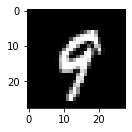

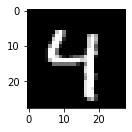

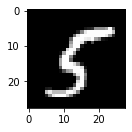

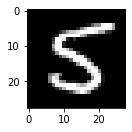

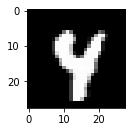

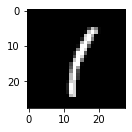

In [17]:
#Visualization
import matplotlib.pyplot as plt

examples = iter(load_trainData) #or load_testData
example_data, example_target = examples.next()

#Set the range to 6, else you end up with the below error
#ValueError: num must be 1 <= num <= 6
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.show()


  #Random note : The good qualities for Activation functions are non linearity and diffirentiability

    ReLU - Rectified Liear Activation Function:
        - It's fast, non-linear, diffirentiable, NO VANISHING GRADIENT ISSUE
        - Can't deal with negative inputs (won't support back propogation), neurons die.

    Leaky ReLU - Variation of ReaLU that deals with the dying neurons
        - Derivative is not zero, just a very small fraction. So neurons won't stop learning during back propogation
    
    Sigmoid - Output range b/w 0 and 1
        - non-linear, diffirentiable, good for binary classification properties
        - VANISHING GRADIENT PROBLEM, Slow computation
    
    Tanh - Output Range b/w +1 to -1
        - non linear and diffirentiable 
        - can be used to transform outputs to a negative value
        - VANISHING GRADIENT ISSUE
    
    SoftMax - Produce Probability distribution as a vector ranging b/w 0 and 1
        - Good for Multiclass classification


In [18]:
#Creating the Neural Net :  
#Selectig the activation function:

#To implement a FNN - we require linear and non linear layers
class NeuralNet(nn.Module):
    def __init__(self, inputSize, hiddenSize, outputSize):

        super(NeuralNet, self).__init__()
        #The linear function
        self.LinFunc1 = nn.Linear(inputSize, hiddenSize)
        #The non linear function
        self.sigFunc = torch.nn.Sigmoid()
        #The Linear readout
        self.LinFunc2 = nn.Linear(hiddenSize, outputSize)

    def feedForward(self, x):
        
        #Output from Linear function
        output = self.LinFunc1(x)
        #Send this output to non linear function
        output = self.sigFunc(output)
        #To the read out linear layer
        output = self.LinFunc2(output)

        return output

        

In [19]:
#Instantiate the model class
model = NeuralNet(input_size, hidden_size, output_size)

The Loss Function : As a part of training a deep learning model, we require to choose an error function that caan be used to estimate an error value, in order to update the model for reduction of over all errors

(Specific to Regression Loss Functions)

-> Mean Squared Error Loss (MSE)

-> Mean Squared logarithimic loss

-> Mean Absolute Error Loss

(Specific to Binary Classifications)

-> Cross-Entropy

-> Hinge Loss

-> Squared Hinge Loss

(Specific to Multi-Class Classification Loss Functions)

-> Multi-Class Cross-Entropy Loss

-> Sparse Multiclass Cross-Entropy Loss

-> Kullback Leibler Divergence Loss


In [20]:
#Initializing the Loss Class

#~ Multiclass classification - going for the CrossEntropyLoss 
lossFunction = nn.CrossEntropyLoss()

How do I MANUALLY optimize the weights of my neural network?

Stochastic gradient descent optimization algorithm
    -> Errors are assigned proportionally based on network weights (backpropogation algorithm)


In [21]:
#We will stick to the Stochastic Gradient Decent(SGD)
#parameters = parameters - learning_rate * parameters_gradients
optimization = torch.optim.SGD(model.parameters(), lr=learning_rate)

NOTE : Non-linear layers have no parameters to update. They are merely mathematical functions performed on Y, the output of our linear layers.

In [24]:
#print(model.parameters()) -> returns generator object, so we'll need a list

print(len(list(model.parameters())))

#So we have 4 parameters
print(list(model.parameters())[0].size())

#To be Continued.....

4
torch.Size([100, 784])
